# <font color='red' style='font-size: 30px;'> Dados dos Boletins Epidemiológicos </font>
<hr style='border: 2px solid red;'>

## <font color = 'black' style='font-size: 26px;'> Imports </font>  
<hr style = 'border: 1.5px solid black;'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <font color = 'black' style='font-size: 26px;'> Datasets </font>  
<hr style = 'border: 1.5px solid black;'>

In [2]:
df1 = pd.read_excel('../Dados/XLSX_Painel_2020.xlsx', usecols=['DATA', 'CONFIRMADOS', 'RECUPERADOS'])
df1['DATA'] = pd.to_datetime(df1['DATA']).dt.date

In [3]:
df1.fillna(0, inplace=True)
df1.drop(index=0, axis=0, inplace=True)
df1.head(4)

,DATA,CONFIRMADOS,RECUPERADOS
1,2020-03-04,1,0.0
2,2020-03-07,1,0.0
3,2020-03-14,1,0.0
4,2020-03-14,1,0.0


In [4]:
df2 = pd.read_csv('../Dados/CSV_Painel_2020_OBITOS.csv', sep=';', usecols=['DATA', 'NUM_OBITOS'])
df2['DATA'] = pd.to_datetime(df2['DATA']).dt.date

C:\Users\paulo\AppData\Local\Temp\ipykernel_8124\3575945900.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['DATA'] = pd.to_datetime(df2['DATA']).dt.date


In [5]:
df2.fillna(0, inplace=True)
df2.drop(index=0, axis=0, inplace=True)
df2.head(4)

,NUM_OBITOS,DATA
1,0,2020-03-19
2,0,2020-03-19
3,0,2020-03-19
4,0,2020-03-19


## <font color = 'black' style='font-size: 26px;'> Manipulando os Dados </font>  
<hr style = 'border: 1.5px solid black;'>

In [6]:
# Agrupando pela data
df1_data = df1.groupby(by='DATA').sum()
df2_data = df2.groupby(by='DATA').sum()

In [7]:
df_merge = pd.merge(df1_data, df2_data, left_index=True, right_index=True, how='outer')
df_merge.fillna(0, inplace=True)
df_merge.head(10)

,CONFIRMADOS,RECUPERADOS,NUM_OBITOS
DATA,,,
2020-03-04,1,0.0,0.0
2020-03-07,1,0.0,0.0
2020-03-14,2,0.0,0.0
2020-03-16,4,0.0,0.0
2020-03-17,7,0.0,0.0
2020-03-18,7,0.0,0.0
2020-03-19,5,0.0,2.0
2020-03-20,12,0.0,0.0
2020-03-21,36,0.0,0.0


In [8]:
# População Estado de Minas Gerais
pop = 20538718
nos = 100000
proporcao = nos / pop
proporcao

0.004868853060838558

In [9]:
acumulados_inf = []
acumulados_obitos = []

In [10]:
confirmados = df_merge['CONFIRMADOS'].to_list()
recuperados = df_merge['RECUPERADOS'].to_list()
obitos = df_merge['NUM_OBITOS']

In [11]:
for i in range(len(confirmados)):
    if i == 0:
        acumulados_inf.append(confirmados[i])
        acumulados_obitos.append(obitos[i])
    else:
        acumulados_inf.append(confirmados[i] + acumulados_inf[i-1])
        acumulados_obitos.append(obitos[i] + acumulados_obitos[i-1])

In [12]:
df_merge['INF_ACUMULADOS'] = acumulados_inf
df_merge['OBITOS_ACUMULADOS'] = acumulados_obitos
df_merge['REFRATARIOS'] = df_merge['RECUPERADOS'] + df_merge['OBITOS_ACUMULADOS']
df_merge['INFECTADOS'] = df_merge['INF_ACUMULADOS'] - df_merge['REFRATARIOS']
df_merge['SUCETIVEIS'] = pop - df_merge['INFECTADOS'] - df_merge['REFRATARIOS']
df_merge.tail(10)

,CONFIRMADOS,RECUPERADOS,NUM_OBITOS,INF_ACUMULADOS,OBITOS_ACUMULADOS,REFRATARIOS,INFECTADOS,SUCETIVEIS
DATA,,,,,,,,
2020-12-22,4201,454155.0,23.0,503700,11258.0,465413.0,38287.0,20035018.0
2020-12-23,6519,460243.0,97.0,510219,11355.0,471598.0,38621.0,20028499.0
2020-12-24,5969,465335.0,120.0,516188,11475.0,476810.0,39378.0,20022530.0
2020-12-25,4030,468705.0,87.0,520218,11562.0,480267.0,39951.0,20018500.0
2020-12-26,2113,470289.0,23.0,522331,11585.0,481874.0,40457.0,20016387.0
2020-12-27,1217,471847.0,7.0,523548,11592.0,483439.0,40109.0,20015170.0
2020-12-28,1110,473047.0,13.0,524658,11605.0,484652.0,40006.0,20014060.0
2020-12-29,4995,479188.0,10.0,529653,11615.0,490803.0,38850.0,20009065.0
2020-12-30,6391,485887.0,169.0,536044,11784.0,497671.0,38373.0,20002674.0


In [13]:
dezembro = pd.DataFrame()
dezembro['SUCETIVEIS'] = round(df_merge['SUCETIVEIS'][263 : 294] * proporcao)
dezembro['INFECTADOS'] = round(df_merge['INFECTADOS'][263 : 294] * proporcao)
dezembro['REFRATARIOS'] = round(df_merge['REFRATARIOS'][263 : 294] * proporcao)
dezembro = dezembro.astype(int)
dezembro.to_csv(path_or_buf='dados.csv', index=False, header=False)

In [14]:
dezembro

,SUCETIVEIS,INFECTADOS,REFRATARIOS
DATA,,,
2020-12-01,97957,131,1912
2020-12-02,97935,135,1930
2020-12-03,97912,136,1952
2020-12-04,97891,142,1966
2020-12-05,97866,148,1986
2020-12-06,97851,153,1996
2020-12-07,97847,154,1999
2020-12-08,97834,153,2012
2020-12-09,97814,152,2033


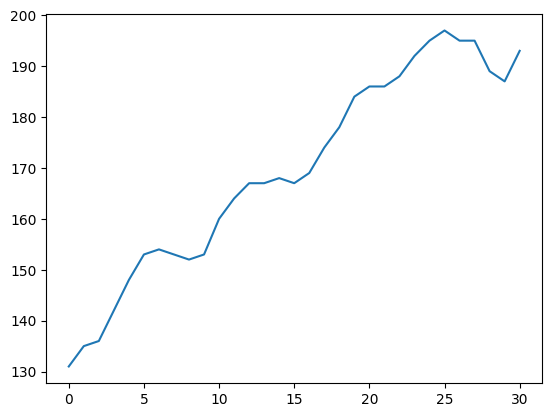

In [15]:
plt.plot([x for x in range(31)], dezembro['INFECTADOS'], label='Infectados', linestyle='-')
plt.show()

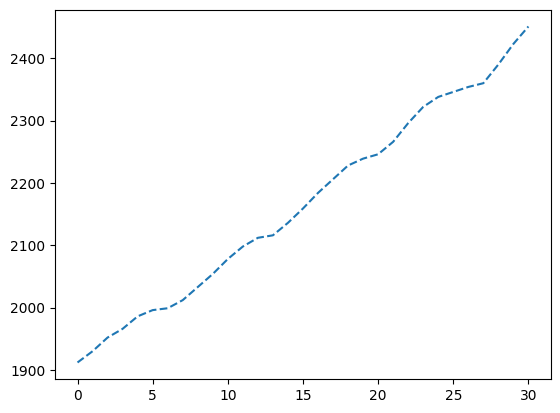

In [16]:
plt.plot([x for x in range(31)], dezembro['REFRATARIOS'], label='Recuperados', linestyle='--')
plt.show()